In [589]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import pprint

In [590]:
## Specfify working directory & Dir of output file
DIR_LC = "C:\\Users\\Owner\\OneDrive - UTS\Chapter 4\\Chapter 4 Experimental Data\\Light Curves (MC-PAM)\\Day5 Rep1"
DIR_SIGMA = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Sigma(II)\\Day5 R1"
DIR_OUTPUT = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Organised Data"
os.chdir(DIR_LC)

In [652]:
## Import Light Curve Files
LIGHT_CURVE_FILES = {"Bottle1": "{}\\PB1.csv".format(DIR_LC),
              "Bottle2": "{}\\PB2.csv".format(DIR_LC),
               "Bottle3": "{}\\PB3.csv".format(DIR_LC),
               "Bottle4": "{}\\PB4.csv".format(DIR_LC),
               "Bottle6": "{}\\PB6.csv".format(DIR_LC),
               "Bottle7": "{}\\PB7.csv".format(DIR_LC),
               "Bottle8": "{}\\PB8.csv".format(DIR_LC),
               "Bottle9": "{}\\PB9.csv".format(DIR_LC),
               "Bottle10": "{}\\PB10.csv".format(DIR_LC),
              }

LC_DATA = list()
for i in range(11):
    if i != 0 and i != 5:
        data = pd.read_csv(LIGHT_CURVE_FILES["Bottle{}".format(i)], sep=";", encoding='cp1252')
        LC_DATA.append(data)    

In [653]:
## Import Sigma Files
SIGMA_FILES = {"Bottle1": "{}\\PB1.csv".format(DIR_SIGMA),
              "Bottle2": "{}\\PB2.csv".format(DIR_SIGMA),
               "Bottle3": "{}\\PB3.csv".format(DIR_SIGMA),
               "Bottle4": "{}\\PB4.csv".format(DIR_SIGMA),
               "Bottle6": "{}\\PB6.csv".format(DIR_SIGMA),
               "Bottle7": "{}\\PB7.csv".format(DIR_SIGMA),
               "Bottle8": "{}\\PB8.csv".format(DIR_SIGMA),
               "Bottle9": "{}\\PB9.csv".format(DIR_SIGMA),
               "Bottle10": "{}\\PB10.csv".format(DIR_SIGMA),
              }

SIGMA_DATA = list()
for i in range(11):
    if i != 0 and i != 5:
        data = pd.read_csv(SIGMA_FILES["Bottle{}".format(i)], sep=";", encoding='cp1252')
        SIGMA_DATA.append(data)    

In [654]:
print(SIGMA_DATA[0]["Sigma"])

0       nm²
1     3.043
2     2.376
3     0.727
4     1.280
5     1.579
Name: Sigma, dtype: object


In [675]:
## Calculate PAR(II) and ETR(II)
PAR_II_VALUES = {}
ETR_II_VALUES = {}
for i in range(len(LC_DATA)):
    PARII_VALUES, ETRII_VALUES = [], []
    for x in range(len(LC_DATA[i]["ETR"])):
        PAR_II_CALC = float(SIGMA_DATA[i]["Sigma"][5])  * 0.6022 * LC_DATA[i]["PAR"][x] 
        ETR_II_CALC = PAR_II_CALC * (LC_DATA[i]["Y(II)"][x] / np.nanmax(LC_DATA[i]["Y(II)"]))
        PARII_VALUES.append(PAR_II_CALC)
        ETRII_VALUES.append(ETR_II_CALC)
        PAR_II_VALUES["Bottle1"] = PAR_II_CALC
        
        print(PAR_II_VALUES)

{'Bottle1': nan}
{'Bottle1': nan}
{'Bottle1': 0.0}
{'Bottle1': 0.0}
{'Bottle1': 1.9017475999999998}
{'Bottle1': 10.4596118}
{'Bottle1': 29.477087799999996}
{'Bottle1': 52.298058999999995}
{'Bottle1': 76.069904}
{'Bottle1': 108.39961319999999}
{'Bottle1': 142.63107}
{'Bottle1': 185.42039099999997}
{'Bottle1': 247.22718799999996}
{'Bottle1': 328.05146099999996}
{'Bottle1': 418.38447199999996}
{'Bottle1': 528.6858328}
{'Bottle1': 656.1029219999999}
{'Bottle1': 802.5374871999999}
{'Bottle1': 957.5299165999999}
{'Bottle1': 1147.7046765999999}
{'Bottle1': 1344.5355531999999}
{'Bottle1': 1606.0258481999997}
{'Bottle1': 1896.9932309999997}
{'Bottle1': nan}
{'Bottle1': nan}
{'Bottle1': nan}
{'Bottle1': 0.0}
{'Bottle1': 0.0}
{'Bottle1': 0.9460561999999999}
{'Bottle1': 1.8921123999999998}
{'Bottle1': 10.406618199999999}
{'Bottle1': 29.327742199999996}
{'Bottle1': 52.03309099999999}
{'Bottle1': 75.684496}
{'Bottle1': 107.85040679999999}
{'Bottle1': 141.90842999999998}
{'Bottle1': 184.4809589999999

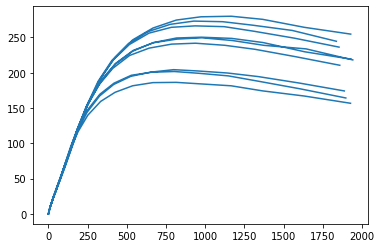

In [633]:
plt.plot(PAR_II_VALUES, ETR_II_VALUES)

<ErrorbarContainer object of 3 artists>

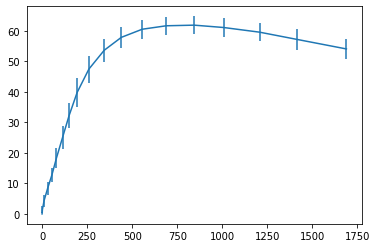

In [592]:
## Find Average and StDev of Selected Parameter
VALUE_TO_PROCESS = "ETR"

PARAMETER_AV, PARAMETER_STDEV = [], []
for values in BOTTLE_REP1[[VALUE_TO_PROCESS]]:
    PARAMETER_AV.append((BOTTLE_REP1[values] + BOTTLE_REP2[values] + BOTTLE_REP3[values])/3)
    PARAMETER_STDEV.append(np.std([BOTTLE_REP1[values], BOTTLE_REP2[values], BOTTLE_REP3[values]]))

## Reshape and flatten array
PARAMETER_AV = np.transpose(PARAMETER_AV)
PARAMETER_AV = PARAMETER_AV.flatten()
PARAMETER_STDEV = np.transpose(PARAMETER_STDEV)
PARAMETER_STDEV = PARAMETER_STDEV.flatten()

## Plot parameter
plt.errorbar(np.array(BOTTLE_REP2[["PAR"]]), PARAMETER_AV, yerr=PARAMETER_STDEV)

In [567]:

PARII_AV = []
for values in BOTTLE_REP1[["PAR"]]:
    BOTTLE1_CALC_PARII = float(SIGMA_REP1["Sigma"][5]) * 0.6022 * BOTTLE_REP1[values]
    PARII_AV.append(BOTTLE1_CALC_PARII)
PARII_AV = np.transpose(PARII_AV)
PARII_AV = PARII_AV.flatten()

ETRII_AV = []
for values in BOTTLE_REP1[["Y(II)"]]:
    for i in range(len(PARII_AV)):
        BOTTLE_CALC_ETRII = PARII_AV[i] * (BOTTLE_REP1[values][i] / np.nanmax(BOTTLE_REP1[values]))
        ETRII_AV.append(BOTTLE_CALC_ETRII)

In [570]:
for values in ETRII_AV:
    print(round(values, 4))
    
print()
for values in PARII_AV:
    print(round(values, 2))

nan
nan
nan
0.0
1.8486
9.5977
22.2725
35.8636
51.3153
73.1243
95.8178
120.1607
146.748
169.5238
185.2345
196.4112
200.6795
201.7552
199.2625
195.5586
187.7843
177.2012
164.2648
nan

nan
nan
0.0
0.0
1.9
10.46
29.48
52.3
76.07
108.4
142.63
185.42
247.23
328.05
418.38
528.69
656.1
802.54
957.53
1147.7
1344.54
1606.03
1896.99
nan


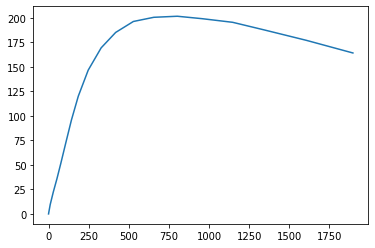

In [562]:
plt.plot(PARII_AV, ETRII_AV)

In [485]:
## Print out values
for values in PARAMETER_AV:
    print(round(values, 4))

for values in PARAMETER_STDEV:
    print(round(values, 4))

nan
nan
nan
0.0
0.4
1.4
4.3
8.3667
12.8333
18.3333
25.1
32.2333
39.8667
47.5
53.6667
57.9
60.5667
61.7
61.9
61.1333
59.6
57.2333
54.1
nan
nan
nan
nan
nan
0.0
0.1414
1.1314
1.9096
2.1484
2.3837
3.3728
3.6779
4.0828
4.6457
4.4144
3.7854
3.5223
3.0706
2.9017
2.9223
2.9579
2.953
3.3639
3.1948
nan
nan
